In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initializing Explanatory and Response Variables of training dataset

In [5]:
X_train = np.array([
    [158,64],
    [170,86],
    [183,84],
    [191,80],
    [155,49],
    [163,59],
    [180,67],
    [158,54],
    [170,67]
])
y_train = ['male','male','male','male','female','female','female','female','female']

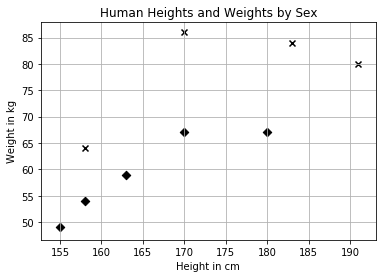

In [6]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

# Calculating Eucledian Distance of the test instance with rest of training dataset instances

In [9]:
x = np.array([[155,70]])
distances = np.sqrt(np.sum((X_train - x)**2,axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

# Finding 3 nearest neighbors

In [11]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train,nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

# Most common sex of the nearest neighbors

In [12]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

# Plotting test instance and the nearest neighbors

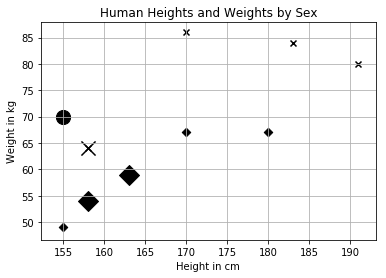

In [14]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')
plt.grid(True)
plt.show()

# Implementing KNN with sklearn

In [15]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [16]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [19]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train,y_train_binarized.reshape(-1))

prediction_binarized = clf.predict(np.array([155,70]).reshape(1,-1))
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

# Making predictions on test set

In [23]:
X_test = np.array([
    [168,65],
    [180,96],
    [160,52],
    [169,67]
])
y_test = ['male','male','female','female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


# Evaluating performance through different measures

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,predictions_binarized))

Accuracy: 0.75


In [25]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized,predictions_binarized))

Precision: 1.0


In [26]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized,predictions_binarized))

Recall: 0.5


In [27]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized,predictions_binarized))

F1 score: 0.6666666666666666


In [28]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient is : %s' % matthews_corrcoef(y_test_binarized,predictions_binarized))

Matthews correlation coefficient is : 0.5773502691896258


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized,predictions_binarized,target_names= ['male'], labels = [1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2

